In [14]:
import numpy as np
import gym
from skimage import feature
from skimage import color
import matplotlib.pyplot as plt
import cv2

In [2]:
env = gym.make('SpaceInvaders-v0')
state = env.reset()

[2018-02-22 18:14:44,308] Making new env: SpaceInvaders-v0


(210, 160, 3)

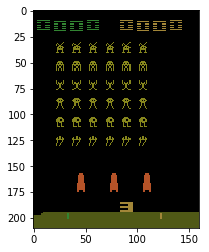

In [39]:
plt.imshow(state)
state.shape

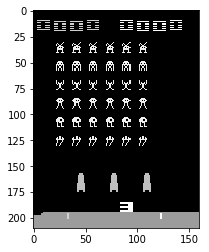

In [11]:
state_gs = color.rgb2gray(state)
plt.imshow(state_gs, cmap='gray')

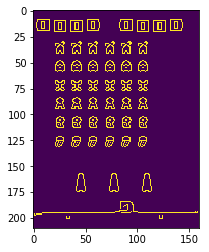

In [12]:
edges = feature.canny(state_gs)
plt.imshow(edges)

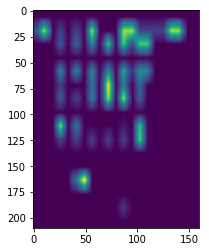

In [30]:
edges_int = edges.astype(float)
small = cv2.resize(edges_int, (21, 16))
resized = cv2.resize(small, edges.shape[::-1])
plt.imshow(resized)

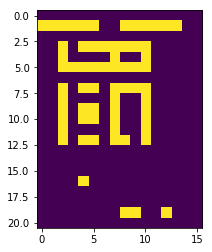

In [53]:
c_height = c_width = 10
n_rows = edges.shape[0] // c_height
n_cols = edges.shape[1] // c_width
fractions = np.zeros((n_rows, n_cols))
final = np.zeros((n_rows, n_cols))
for i in range(n_cols):
    for j in range(n_rows):
        cell = edges[j*c_height:(j+1)*c_height,i*c_width:(i+1)*c_width]
        fraction = np.sum(cell) / (c_height * c_width)
        fractions[j][i] = fraction
        final[j][i] = fraction > 0.15
# plt.imshow(fractions)
plt.imshow(final)

In [51]:
def featurize(state):
    state_gs = color.rgb2gray(state)
    edges = feature.canny(state_gs)  # TODO: can be improved by canny per color
    
    c_height = c_width = 10
    n_rows = edges.shape[0] // c_height
    n_cols = edges.shape[1] // c_width

    final = np.zeros((n_rows, n_cols))
    for i in range(n_cols):
        for j in range(n_rows):
            cell = edges[j*c_height:(j+1)*c_height,i*c_width:(i+1)*c_width]
            fraction = np.sum(cell) / (c_height * c_width)
            final[j][i] = fraction > 0.15
    return final